Question 1 – Programming (60 points):
In week 10, we learned K-means clustering which is a popular machine learning
and data mining algorithm that discovers potential clusters within a dataset.
Finding these clusters in a dataset can often reveal interesting and meaningful
structures underlying the distribution of data.
In this programming problem, you will get familiar with how to implement K-
means algorithms and use K-means to clustering a 2D dataset. Then you will
further try K-means on the MNIST dataset which we met in HW4. (For the
introduction of MNIST dataset, please refer to HW4).
To help you get started, we summarize the K-means algorithm in pseudo code as
follows

In [1]:
import numpy as np
print(np.__version__)

1.26.4


data = Load Data
centroids = Randomly Create K Centroids
while centroids not converged:
for each data point:
assign data point to the closest centroid
for each cluster:
set new centroid location to be the mean of
all points in this cluster

In this homework, you will follow the step-by-step instructions to accomplish the
tasks.
Step 1 2D Data Generalization and Visualization (10 pts):
In this step, you need to:

a) Generate a 2D dataset that includes two separate categories of data, each
of which contains 100 data points that normally distributed. The two
categories have a mean of (1, 1) and (5, 5), respectively. Both categories
have a standard deviation of 1.
Tips 1: To generate the data, you can explore the function
np.random.normal which draws random samples from a normal
distribution.
Tips 2: After you generate two categories of data, please remember to
combine the data into one dataset. You have multiple methods to do so,
but remember to combine the data in a row-wise manner

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#category1, generating the datesets.
mean_1=[1,1]
std_1=1
size_1=100

#category2
mean_2=[5,5]
std_2=1
size_2=100

category1 = np.random.normal(loc=mean_1, scale=std_1, size=(size_1, 2))
category2 = np.random.normal(loc=mean_2, scale=std_2, size=(size_2, 2))


In [12]:
result = np.concatenate((category1, category2), axis=0) # combining the data into one dataset


b) Visualize the data using scatter plot. You will see something like this:


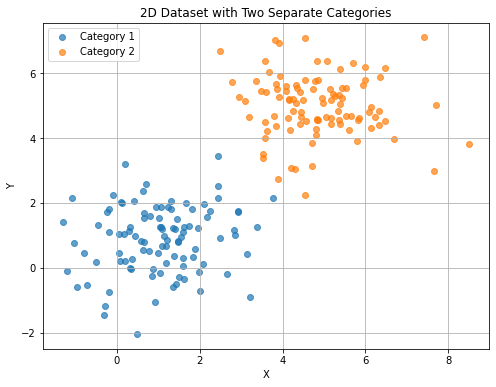

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(category1[:, 0], category1[:, 1], label='Category 1', alpha=0.7)
plt.scatter(category2[:, 0], category2[:, 1], label='Category 2', alpha=0.7)
plt.title("2D Dataset with Two Separate Categories")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

Step 2 Helper Function and Initialization (10 pts)
In this step, you need to:
a) Define a helper function, i.e., the Euclidean distance function.
b) Implement a initialize_centroids function that randomly select K (In this
example, K=2) centroids as the initial centroids. Plot the results and use
marker in pyplot to highlight the centroids. You should have something like
this

In [14]:
 from math import sqrt
  
 def initialize_centroids_function(k,result):
    
    centroids = random.choices(result, k=k)
    
    return np.array(centroids)


    
def Euclidean_distance_function(point, centroid):
    x1, y1 = point
    x2, y2 = centroid
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance


    
    


In [6]:
import random


In [15]:
centroids=initialize_centroids_function(2,result)
centroids

array([[0.70821534, 2.5892135 ],
       [3.83591467, 5.68368543]])

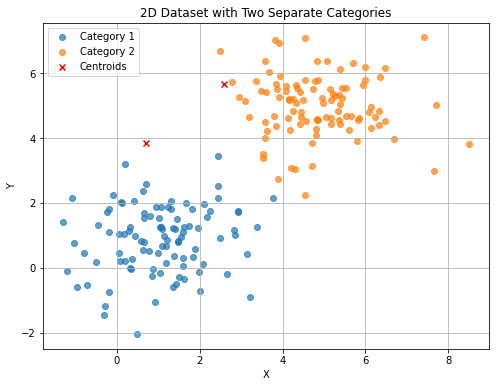

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(category1[:, 0], category1[:, 1], label='Category 1', alpha=0.7)
plt.scatter(category2[:, 0], category2[:, 1], label='Category 2', alpha=0.7)
plt.scatter(centroids[0], centroids[1], marker="x", color='red', label='Centroids')

plt.title("2D Dataset with Two Separate Categories")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

Step 3 K-means Implementation (25 pts)
As shown in the pseudo code, each iteration of K-means algorithm includes two
actions: 1) Assign each point to the nearest centroids 2) Update the centroid. To
implement K-means, we define two functions assign_cluster and
update_centroids corresponding to these two actions.
In this step, you need to:
a) Implement assign_cluster function. In this function, you need to calculate
the distance between the assigned point and the centroids. Then you need
to assign the point to the nearest centroid
b) Implement update_centroids function. You need to calculate the mean of
all the points assigned to each centroid to determine the new centroids.
c) Implement K-means function. The algorithm converges when all centroids
remain unchanged, i.e., all the new centroids = old centroids. You need to
use this as the stop criteria.
d) Apply the K-means algorithm on the generated data and visualize the
result. You will get something like this

In [17]:
def assign_cluster(result,centroids,Euclidean_distance_function):
    points_1=[] 
    points_2=[] 
    

    for i in range(len(result)):
        
        distance_1=Euclidean_distance_function(result[i],centroids[0])
        distance_2=Euclidean_distance_function(result[i],centroids[1])
        
        if distance_1<distance_2:
            #assign to the centroid[0]
            
            points_1.append(result[i,:])
            
        else:
            #assign to the centroid[1]
            points_2.append(result[i,:])
            
    return np.array(points_1), np.array(points_2)

            
            
def update_centroids(points_1,points_2):
    
    new_centroid_1=np.mean(points_1, axis=0)
    new_centroid_2=np.mean(points_2, axis=0)
    
    return np.array([new_centroid_1, new_centroid_2])



In [18]:
old_centroids=initialize_centroids_function(2,result)
new_centroids = old_centroids.copy() 

while not np.array_equal(new_centroids, old_centroids):
    
    
    old_centroids = np.copy(new_centroids)
    
    points_1, points_2 = assign_cluster(result, old_centroids, Euclidean_distance_function)
    new_centroids = update_centroids(points_1, points_2)
    
    
    
    
print(f"Final Centroids: {new_centroids}" ) 

Final Centroids: [[5.36076235 4.57300593]
 [3.94819669 5.91060729]]


In [20]:
import numpy as np
from math import sqrt

# Initializing centroids
def initialize_centroids_function(k, result):
    indices = np.random.choice(len(result), size=k, replace=False)
    centroids = result[indices]
    return np.array(centroids)

# Calculating Euclidean distance
def Euclidean_distance_function(point, centroid):
    return sqrt(np.sum((point - centroid)**2))

# Assigning points to clusters
def assign_cluster(result, centroids, Euclidean_distance_function):
    points_1 = []
    points_2 = []

    for i in range(len(result)):
        distance_1 = Euclidean_distance_function(result[i, :], centroids[0])
        distance_2 = Euclidean_distance_function(result[i, :], centroids[1])

        if distance_1 < distance_2:
            points_1.append(result[i, :])
        else:
            points_2.append(result[i, :])
    
    return np.array(points_1), np.array(points_2)

# Updating centroids
def update_centroids(points_1, points_2):
   
    new_centroid_1 = np.mean(points_1, axis=0)
    new_centroid_2 = np.mean(points_2, axis=0)
    return np.array([new_centroid_1, new_centroid_2])

# Main K-means loop
old_centroids = initialize_centroids_function(2, result)
new_centroids = np.copy(old_centroids)

tolerance = 1e-6  # Convergence threshold

while True:
    old_centroids = np.copy(new_centroids)
    points_1, points_2 = assign_cluster(result, old_centroids, Euclidean_distance_function)
    new_centroids = update_centroids(points_1, points_2)
    
    if np.allclose(new_centroids, old_centroids, atol=tolerance):
        print("Converged!")
        break

print(f"Final Centroids: {new_centroids}")


Converged!
Final Centroids: [[4.81547539 4.95848946]
 [1.00348714 0.84893902]]


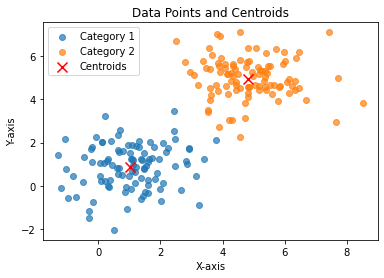

In [21]:
import matplotlib.pyplot as plt

plt.scatter(category1[:, 0], category1[:, 1], label='Category 1', alpha=0.7)
plt.scatter(category2[:, 0], category2[:, 1], label='Category 2', alpha=0.7)

new_centroids_array = np.array(new_centroids)

# Plotting the new centroids with a distinct marker
plt.scatter(new_centroids_array[:, 0], new_centroids_array[:, 1], 
            color='red', marker='x', s=100, label='Centroids')

plt.title('Data Points and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


Now, you have finished implementing K-means algorithm to achieve
clustering with 2D data with 2 centroids. Next, you will use your code to do
clustering on 784-dimensional data. The dataset you will use is the MNIST
dataset which we used in HW4. You have read the data and flattened the
data in HW4. You can check by printing out the dimensions of
train_images.shape and see if it is (60000,784)

In [22]:
import tensorflow as tf
from tensorflow import keras


C:\Users\sheba\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sheba\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [24]:
from sklearn.datasets import fetch_openml


In [43]:
from sklearn.preprocessing import StandardScaler


In [44]:

# Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data
y = mnist.target.astype(int)

C:\Users\sheba\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Flatten images for clustering

x_train_flat = X_train.reshape(X_train.shape[0], -1)

Step 4 [Optional]Train implemented K-means on MNIST dataset (10
pts)
In this step, you need to:
a) Train a K-means model using the training images of MNIST dataset using K =
10. For this step, you can record the time needed for training.
Tips: You can use the functions in packages “datetime” to compute the
time difference

In [47]:
from datetime import datetime


In [51]:
def assign_cluster_1(data, centroids, Euclidean_distance_function):
    clusters = [[] for _ in range(len(centroids))]  # Initializing empty clusters

    for point in data:
        distances = [Euclidean_distance_function(point, centroid) for centroid in centroids]
        nearest_centroid = distances.index(min(distances))  # Finding index of the closest centroid
        clusters[nearest_centroid].append(point)  # Assigning point to the closest cluster

    return [np.array(cluster) for cluster in clusters]  # Convert clusters to NumPy arrays


In [56]:
def update_centroids_1(clusters):
    centroids = []
        
    for cluster in clusters:
       
            centroids.append(np.mean(cluster, axis=0))  # Take mean along the dimensions
    
    return np.array(centroids)
   
    

In [58]:
old_centroids = initialize_centroids_function(10, x_train_flat)
new_centroids = np.copy(old_centroids)

tolerance = 1e-6  # Convergence threshold
start_time = datetime.now()  # Start timing

while True:
    old_centroids = np.copy(new_centroids)
    clusters = assign_cluster_1(x_train_flat, old_centroids, Euclidean_distance_function)
    new_centroids = update_centroids_1(clusters)
    
    if np.allclose(new_centroids, old_centroids, atol=tolerance):
        
        break

end_time = datetime.now()  # End timing
elapsed_time = end_time - start_time  # Calculate time difference        
print(f"Final Centroids: {new_centroids}")


Final Centroids: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
end_time

datetime.datetime(2024, 12, 14, 19, 6, 10, 624656)

tep 5 Mini-Batch Kmeans (20 pts)
You will find that the training takes a long time. This is because the classic
implementation of the clustering method consumes the whole set of input data at
each iteration.
Thus, typically with the increasing size of the dataset, we are more likely to use
Mini-Batch K-means. The idea is to use small random batches of data of a fixed
size. Each iteration a new mini batch from the dataset is obtained and used to
update the clusters until convergence.
In this homework, we do not require you to implement mini-batch K-means.
Instead, you can use the SKLearn package. You can start with:

In this step, you need to:
a) Use the train_images to train a mini-batch K-means model. You need to
train the model under different cluster numbers: K= [10, 16, 64, 256].
b) To evaluate the model, you need to compare the inertia value of each
model to decide which K is better.
Tips: You can use the metrics provided by sklearn to do so. Check the
attributes of sklearn.cluster.MiniBatchKMeans.
c) Apply the best model with the test dataset and print out the inertia velue


In [60]:
import sklearn
from sklearn.cluster import MiniBatchKMeans

In [21]:
import os
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data
y = mnist.target.astype(int)


C:\Users\sheba\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [61]:
K= [10, 16, 64, 256]

In [ ]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Flatten images for clustering

x_train_flat = X_train.reshape(X_train.shape[0], -1)




In [62]:
inertia_list = []

# Perform K-Means clustering for different values of K
for K in K:
    kmeans = MiniBatchKMeans(
        n_clusters=K,
        random_state=42,
        batch_size=100,
        n_init="auto"
    )
    kmeans.fit(x_train_flat)
    inertia_list.append((K, kmeans.inertia_)) 
    

C:\Users\sheba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\User

In [63]:
best_k, best_inertia = min(inertia_list, key=lambda x: x[1])

print(f"Best K: {best_k}, Best Inertia: {best_inertia}")

Best K: 256, Best Inertia: 26764471.29785981


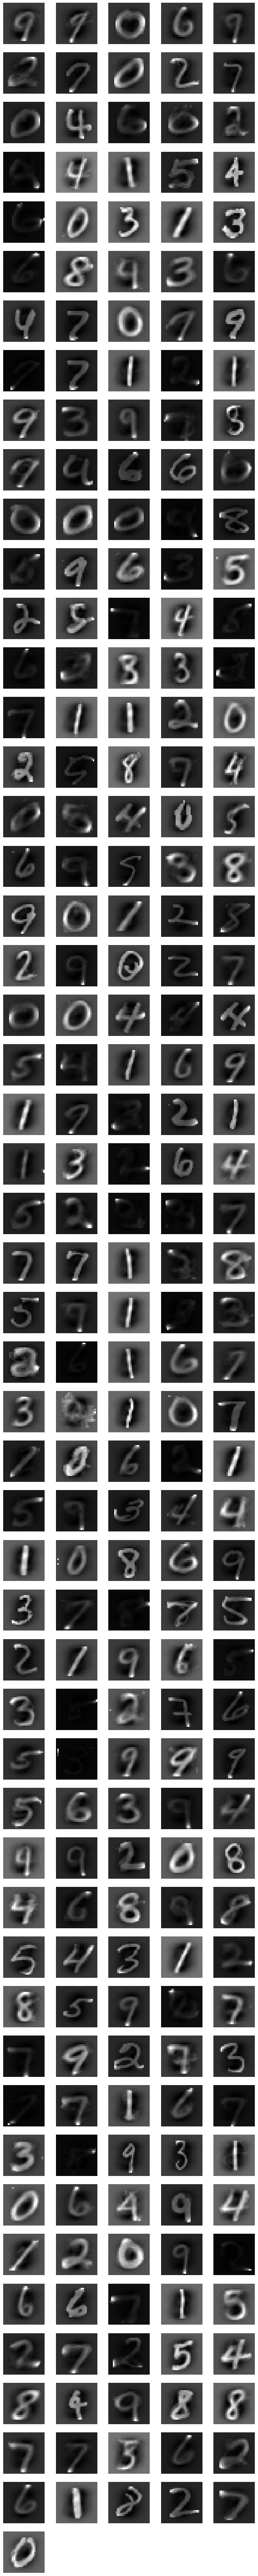

In [39]:
import math

# Number of cluster centers
num_clusters = kmeans.cluster_centers_.shape[0]

# Determine the grid layout (rows and columns)
cols = 5  # Fixed number of columns
rows = math.ceil(num_clusters / cols)  # Calculate required rows dynamically

# Reshape cluster centers for visualization
cluster_centers = kmeans.cluster_centers_.reshape(-1, 28, 28)

# Plot each cluster center
plt.figure(figsize=(10, 2 * rows))  # Adjust figure size dynamically
for i, center in enumerate(cluster_centers):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(center, cmap="gray")
    plt.axis("off")

plt.show()


In [64]:
x_test_flat = X_test.reshape(X_test.shape[0],-1)

In [65]:
kmeans = MiniBatchKMeans(
        n_clusters=256,
        random_state=42,
        batch_size=100,
)

newk=kmeans.fit(x_test_flat)


C:\Users\sheba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sheba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [67]:
intertia_test_data_256=newk.inertia_

In [68]:
intertia_test_data_256

6183795.47727888